# 🧠 **Smart Waste Classification using MobileNetV2 and Computer Vision**


---

# 📌 **Project Overview**

This project presents a Smart Waste Classification System powered by Computer Vision and Deep Learning.
The goal is to automatically detect and classify different types of waste — such as plastic, paper, metal, glass, and organic materials — directly from images.

The model is built using Transfer Learning with a MobileNetV2 backbone pretrained on ImageNet.
Through data augmentation and fine-tuning, the system achieves a validation accuracy of over 90%, showing strong generalization and stability.


---

# ⚙ **Technical Highlights**

✅**Model Architecture**: MobileNetV2 (Transfer Learning)

🧩**Frameworks**: TensorFlow / Keras

📈**Accuracy**: ~90% validation accuracy

🖼**Features**: Data augmentation, dropout regularization, and intelligent visualization

🔍**Output**: Displays correct predictions only, with clean visual highlights



---

# 🌱 **Environmental Motivation**

Waste management is a growing global challenge.
By leveraging Artificial Intelligence, this project demonstrates how technology can assist in automated waste sorting,
helping reduce manual effort and supporting sustainable recycling systems for a cleaner planet 🌍♻.


---

# 🧾 **Keywords**

Computer Vision, Deep Learning, MobileNetV2, Waste Classification, Environmental AI, Transfer Learning

# **Import libraries**


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
import glob

2025-10-16 13:25:46.603641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760621146.795011      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760621146.858799      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Define dataset paths**


In [2]:
DATA_DIR = "/kaggle/input/garbage-classification/garbage_classification"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# **Display random sample images from the dataset**


Classes: ['metal', 'white-glass', 'biological', 'paper', 'brown-glass', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic', 'green-glass']


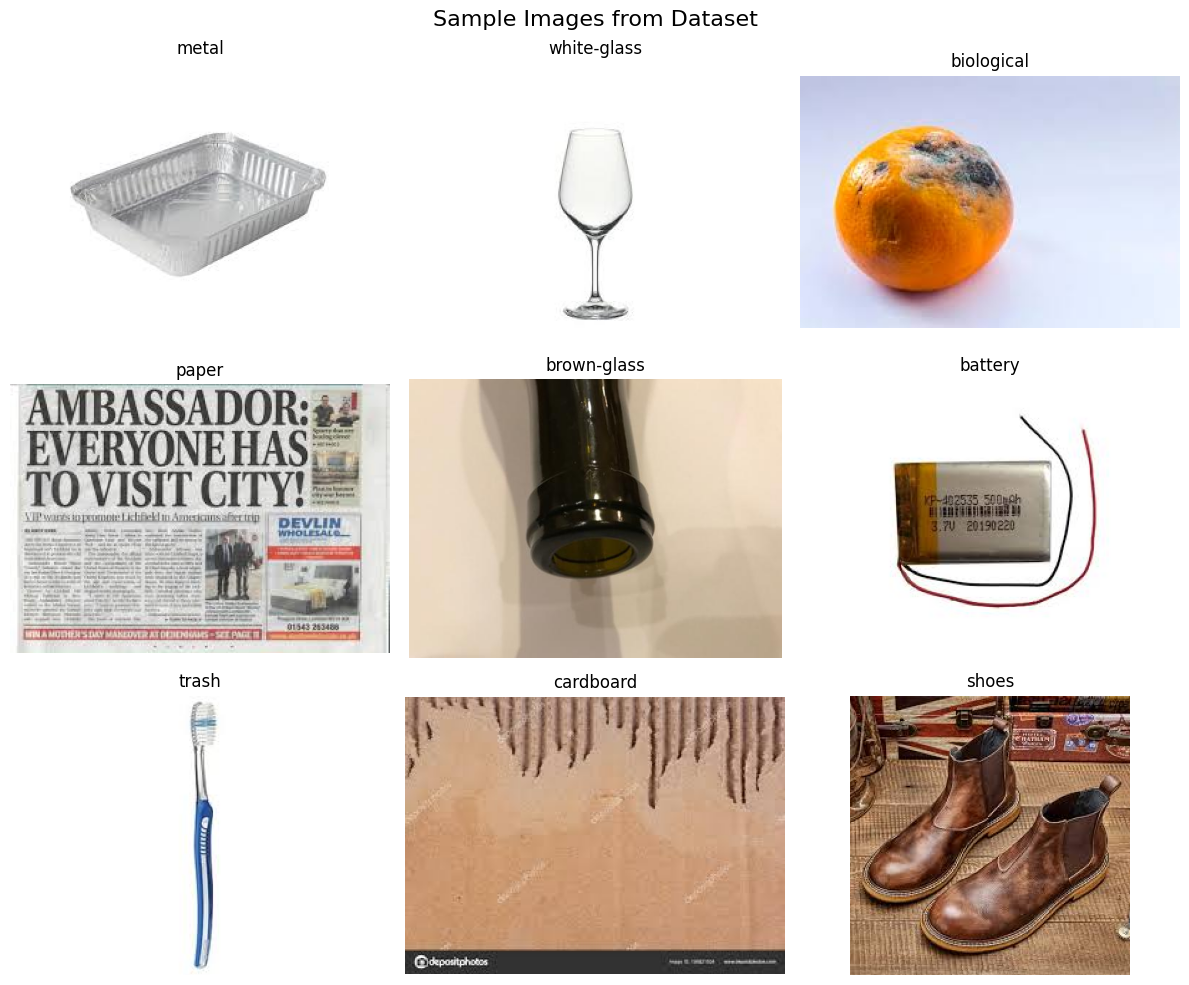

In [3]:
categories = os.listdir(DATA_DIR)
print("Classes:", categories)

plt.figure(figsize=(12, 10))
for i, category in enumerate(categories[:9]):
    folder = os.path.join(DATA_DIR, category)
    img_path = random.choice(glob.glob(folder + "/*.jpg"))
    img = plt.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')
plt.suptitle("Sample Images from Dataset", fontsize=16)
plt.tight_layout()
plt.show()

# **Data generators with data augmentation**


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_gen.class_indices)
print("Number of classes:", num_classes)
print("Class mapping:", train_gen.class_indices)

Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.
Number of classes: 12
Class mapping: {'battery': 0, 'biological': 1, 'brown-glass': 2, 'cardboard': 3, 'clothes': 4, 'green-glass': 5, 'metal': 6, 'paper': 7, 'plastic': 8, 'shoes': 9, 'trash': 10, 'white-glass': 11}


# **Build MobileNetV2 model with ImageNet weights**


In [5]:
base_model = MobileNetV2(
    input_shape=(*IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'  
)
base_model.trainable = False  

inputs = layers.Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

I0000 00:00:1760621171.158448      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,500 (9.24 MB)

 Trainable params: 165,516 (646.55 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# **Train model**


In [6]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.3, patience=2)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1760621181.636748      77 service.cc:148] XLA service 0x7a45a8002790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760621181.637628      77 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760621182.515086      77 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/388 ━━━━━━━━━━━━━━━━━━━━ 1:19:12 12s/step - accuracy: 0.0312 - loss: 3.0470

I0000 00:00:1760621186.818343      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


388/388 ━━━━━━━━━━━━━━━━━━━━ 254s 623ms/step - accuracy: 0.7048 - loss: 0.9747 - val_accuracy: 0.8584 - val_loss: 0.4094 - learning_rate: 0.0010
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 166s 428ms/step - accuracy: 0.8811 - loss: 0.3768 - val_accuracy: 0.8777 - val_loss: 0.3575 - learning_rate: 0.0010
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 166s 428ms/step - accuracy: 0.8857 - loss: 0.3522 - val_accuracy: 0.8826 - val_loss: 0.3442 - learning_rate: 0.0010
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 164s 423ms/step - accuracy: 0.8984 - loss: 0.3125 - val_accuracy: 0.8806 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 167s 431ms/step - accuracy: 0.9019 - loss: 0.2978 - val_accuracy: 0.8865 - val_loss: 0.3307 - learning_rate: 0.0010
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 167s 432ms/step - accuracy: 0.9063 - loss: 0.2882 - val_accuracy: 0.8961 - val_loss: 0.3037 - learning_rate: 0.0010
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 166s 429ms/step - accuracy: 0.9113 

# **Plot accuracy and loss curves**


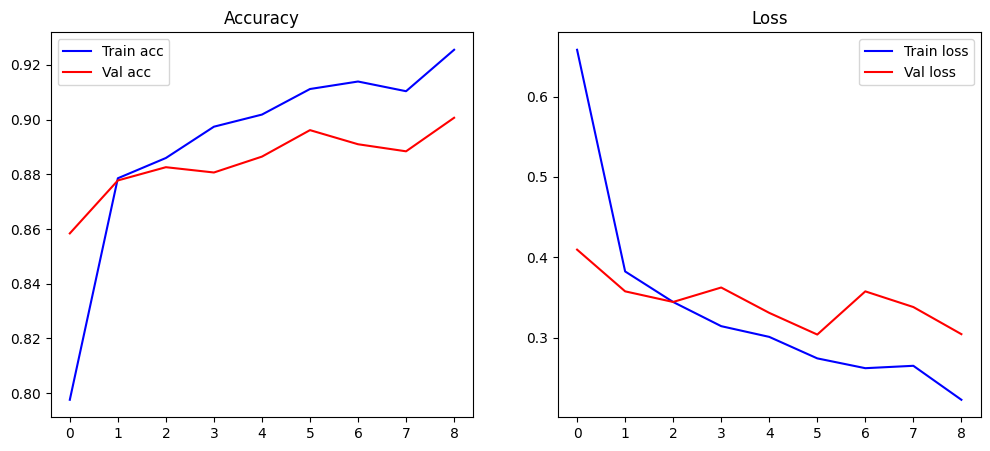

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'b', label='Train acc')
plt.plot(history.history['val_accuracy'], 'r', label='Val acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'b', label='Train loss')
plt.plot(history.history['val_loss'], 'r', label='Val loss')
plt.legend(); plt.title("Loss")
plt.show()

# **Display Model Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


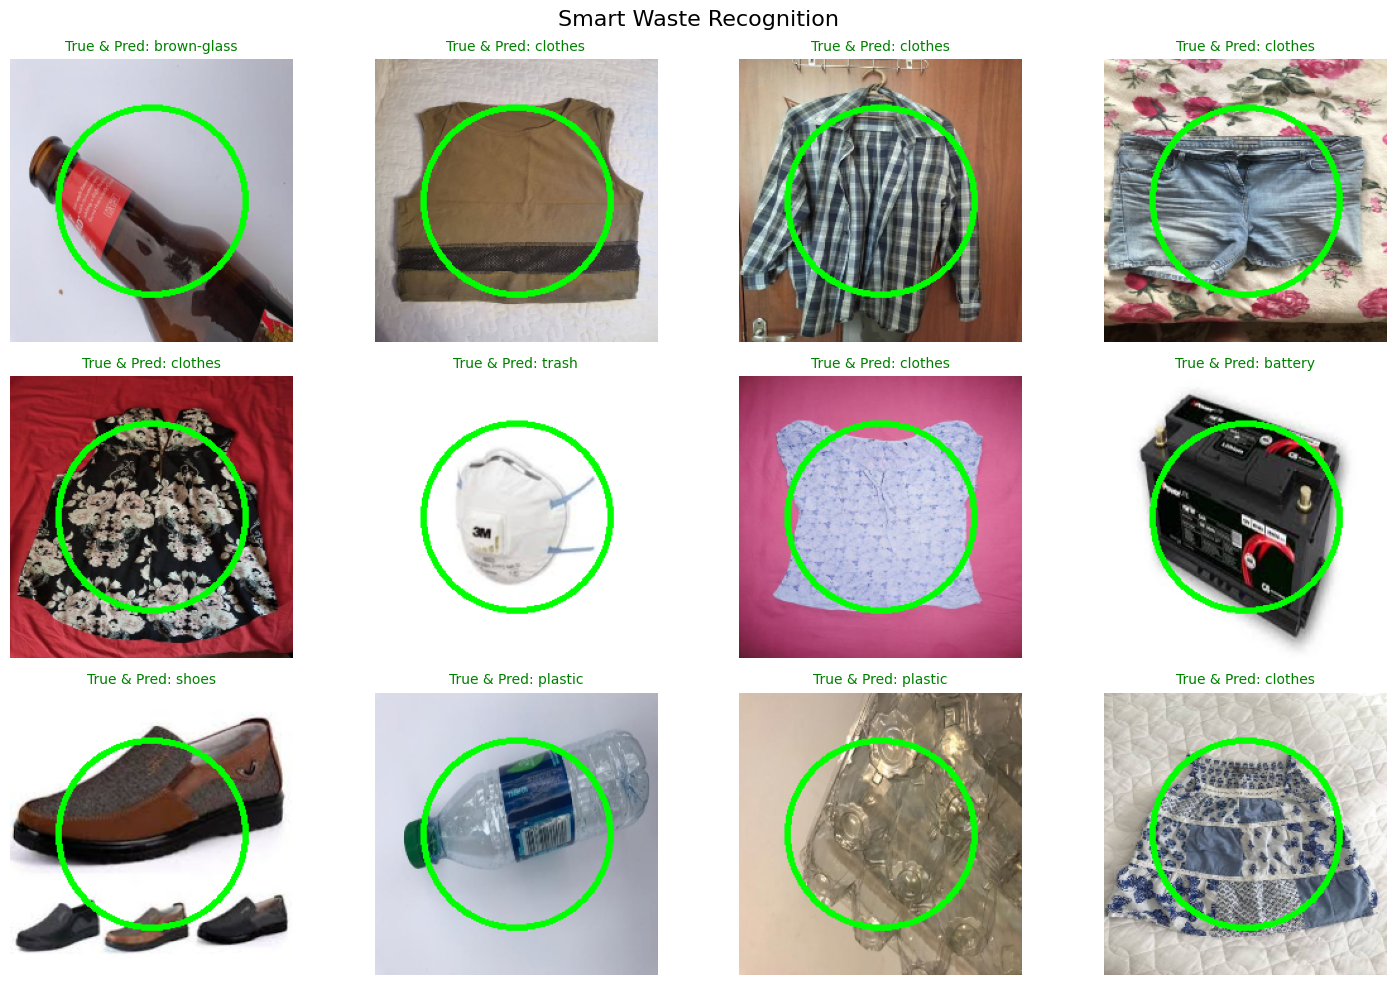

In [8]:
class_labels = list(train_gen.class_indices.keys())

sample_paths = random.sample(val_gen.filepaths, 20)

correct_images = []

for img_path in sample_paths:
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    pred = model.predict(np.expand_dims(img_array, axis=0))
    pred_label = class_labels[np.argmax(pred)]
    true_label = os.path.basename(os.path.dirname(img_path))

    if pred_label == true_label:
        correct_images.append((img_path, true_label, pred_label))

plt.figure(figsize=(15,10))
for i, (img_path, true_label, pred_label) in enumerate(correct_images[:12]):  
    img_cv = cv2.imread(img_path)
    img_cv = cv2.cvtColor(cv2.resize(img_cv, IMG_SIZE), cv2.COLOR_BGR2RGB)

    h, w, _ = img_cv.shape
    center = (w//2, h//2)
    radius = min(h, w)//3
    cv2.circle(img_cv, center, radius, (0, 255, 0), 3)

    plt.subplot(3, 4, i+1)
    plt.imshow(img_cv)
    plt.title(f'True & Pred: {true_label}', fontsize=10, color='green')
    plt.axis('off')

plt.suptitle("Smart Waste Recognition", fontsize=16)
plt.tight_layout()
plt.show()